In [1]:
import pandas as pd
import numpy as np

import src.iodata as iodata
import src.preprocess as preproc
import src.markovchain as mchain
import src.visualize as visualize

## A glimpse at the data

In [2]:
df = iodata.get_df('BAC')[0:100]
df.head()

,timestamp,date,time,bid,bs,ask,as,mid,imb,wmid
0,2011-03-01 09:30:21,40603.0,34221.0,14.33,8.0,14.34,468.0,14.335,0.016807,14.330168
1,2011-03-01 09:30:22,40603.0,34222.0,14.33,20.0,14.34,471.0,14.335,0.040733,14.330407
2,2011-03-01 09:30:23,40603.0,34223.0,14.33,25.0,14.34,148.0,14.335,0.144509,14.331445
3,2011-03-01 09:30:24,40603.0,34224.0,14.33,31.0,14.34,95.0,14.335,0.246032,14.332460
4,2011-03-01 09:30:25,40603.0,34225.0,14.33,29.0,14.34,92.0,14.335,0.239669,14.332397


<AxesSubplot:>

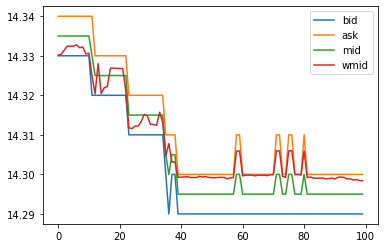

In [3]:
df[['bid','ask','mid','wmid']].plot()

# BAC (Bank of America)
Liquid equit.

In [4]:
n_imb = 10
n_spread = 2
dt = 1
df = iodata.get_df('BAC')
ticker = 'BAC'
df, misc = preproc.discretize(df, n_imb, dt, n_spread)
df = preproc.mirror(df, misc)

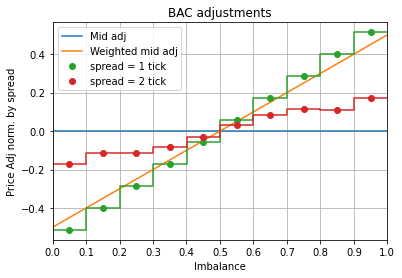

In [5]:
G1, B, Q, Q2, R1, R2, K = mchain.estimate(df)
Gstar, Bstar = mchain.calc_price_adj(G1, B, order='stationary')
visualize.plot_Gstar(ticker, Gstar, misc)

pmf(s = 1 tick) = 0.69
pmf(s = 2 tick) = 0.31


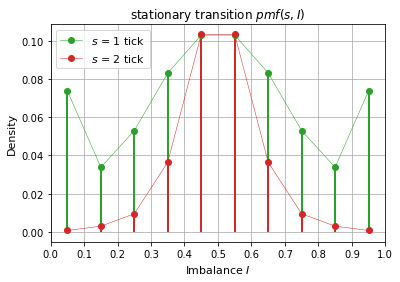

In [6]:
Bstar_pdf = Bstar.iloc[0]  # ~= np.linalg.matrix_power(B,10).iloc[0]
Bstar_pdf = pd.Series(np.linalg.matrix_power(B, 5)[0], index=B.columns)
visualize.plot_Bstar(Bstar_pdf, misc)

# CVX (Chevron Corp)
Less liquid equity.

In [7]:
n_imb = 10
n_spread = 4
dt = 1
df = iodata.get_df('CVX')
ticker = 'CVX'
df, misc = preproc.discretize(df, n_imb, dt, n_spread)
df = preproc.mirror(df, misc)

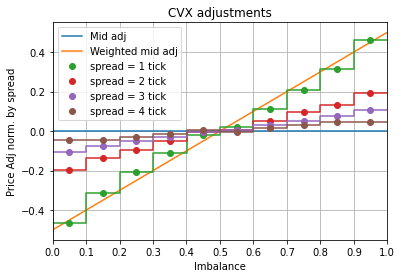

In [8]:
G1, B, Q, Q2, R1, R2, K = mchain.estimate(df)
Gstar, Bstar = mchain.calc_price_adj(G1, B, order='stationary')
visualize.plot_Gstar(ticker, Gstar, misc)

pmf(s = 1 tick) = 0.23
pmf(s = 2 tick) = 0.40
pmf(s = 3 tick) = 0.27
pmf(s = 4 tick) = 0.10


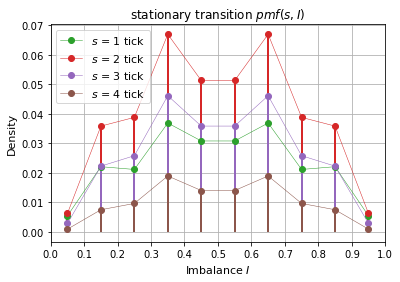

In [9]:
Bstar_pdf = Bstar.iloc[0]  # ~= np.linalg.matrix_power(B,10).iloc[0]
visualize.plot_Bstar(Bstar_pdf, misc)

# XBTUSD

In [10]:
ticker = 'XBTUSD'
df = iodata.get_df(ticker)
# Time resolution is 1ms, so duplicate might occur, keep last.
df = df[~df.index.duplicated(keep='last')]
df.head(5)

,bs,bid,ask,as,time,mid,imb,wmid
timestamp,,,,,,,,
2020-12-14 00:07:24.057000+00:00,83434.0,19077.0,19077.5,890861.0,2020-12-14 00:07:24.057000+00:00,19077.25,0.085635,19077.042818
2020-12-14 00:07:24.072000+00:00,83434.0,19077.0,19077.5,902353.0,2020-12-14 00:07:24.072000+00:00,19077.25,0.084637,19077.042318
2020-12-14 00:07:24.081000+00:00,83434.0,19077.0,19077.5,906348.0,2020-12-14 00:07:24.081000+00:00,19077.25,0.084295,19077.042148
2020-12-14 00:07:24.095000+00:00,83434.0,19077.0,19077.5,911348.0,2020-12-14 00:07:24.095000+00:00,19077.25,0.083872,19077.041936
2020-12-14 00:07:24.097000+00:00,83434.0,19077.0,19077.5,917348.0,2020-12-14 00:07:24.097000+00:00,19077.25,0.083369,19077.041684


In [11]:
n_imb = 10
n_spread = 3
dt = 1
ticker = 'XBTUSD'
df = iodata.get_df(ticker)
df, misc = preproc.discretize(df, n_imb, dt, n_spread)
df = preproc.mirror(df, misc)

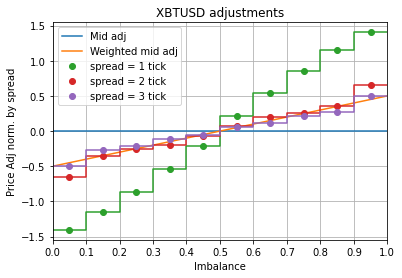

In [12]:
G1, B, Q, Q2, R1, R2, K = mchain.estimate(df)
Gstar, Bstar = mchain.calc_price_adj(G1, B, order='stationary')
visualize.plot_Gstar(ticker, Gstar, misc)

pmf(s = 1 tick) = 0.37
pmf(s = 2 tick) = 0.41
pmf(s = 3 tick) = 0.22


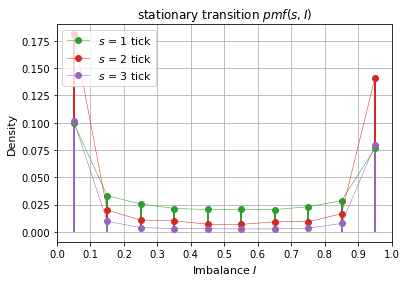

In [13]:
Bstar_pdf = Bstar.iloc[0]  # ~= np.linalg.matrix_power(B,10).iloc[0]
Bstar_pdf = pd.Series(np.linalg.matrix_power(B, 5)[0], index=B.columns)
visualize.plot_Bstar(Bstar_pdf, misc)